In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import graphviz
from sklearn.model_selection import KFold

In [3]:
X = []
Y = []
with open("cancerdata.txt") as data1:
    for line in data1.readlines():
        X.append([int(i) if i!= "?" else -1 for i in line.split(",")[1:10]])
        Y.append(int(line.split(",")[10]))

X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=37)

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

score = accuracy_score(Y_test,Y_pred)
print("Accuracy: {:.2f}%".format(score * 100))

Accuracy: 96.43%


In [5]:
class_names = ["benign","malignant"]
feature_names = ["Clump Thickness",
   "Uniformity of Cell Size",
   "Uniformity of Cell Shape",
   "Marginal Adhesion",
   "Single Epithelial Cell Size",
   "Bare Nuclei",
   "Bland Chromatin",
   "Normal Nucleoli",
  "Mitoses"]

dot_data = tree.export_graphviz(clf, out_file=None, feature_names = feature_names, class_names = class_names) 
graph = graphviz.Source(dot_data)
graph.render("cancer")

'cancer.pdf'

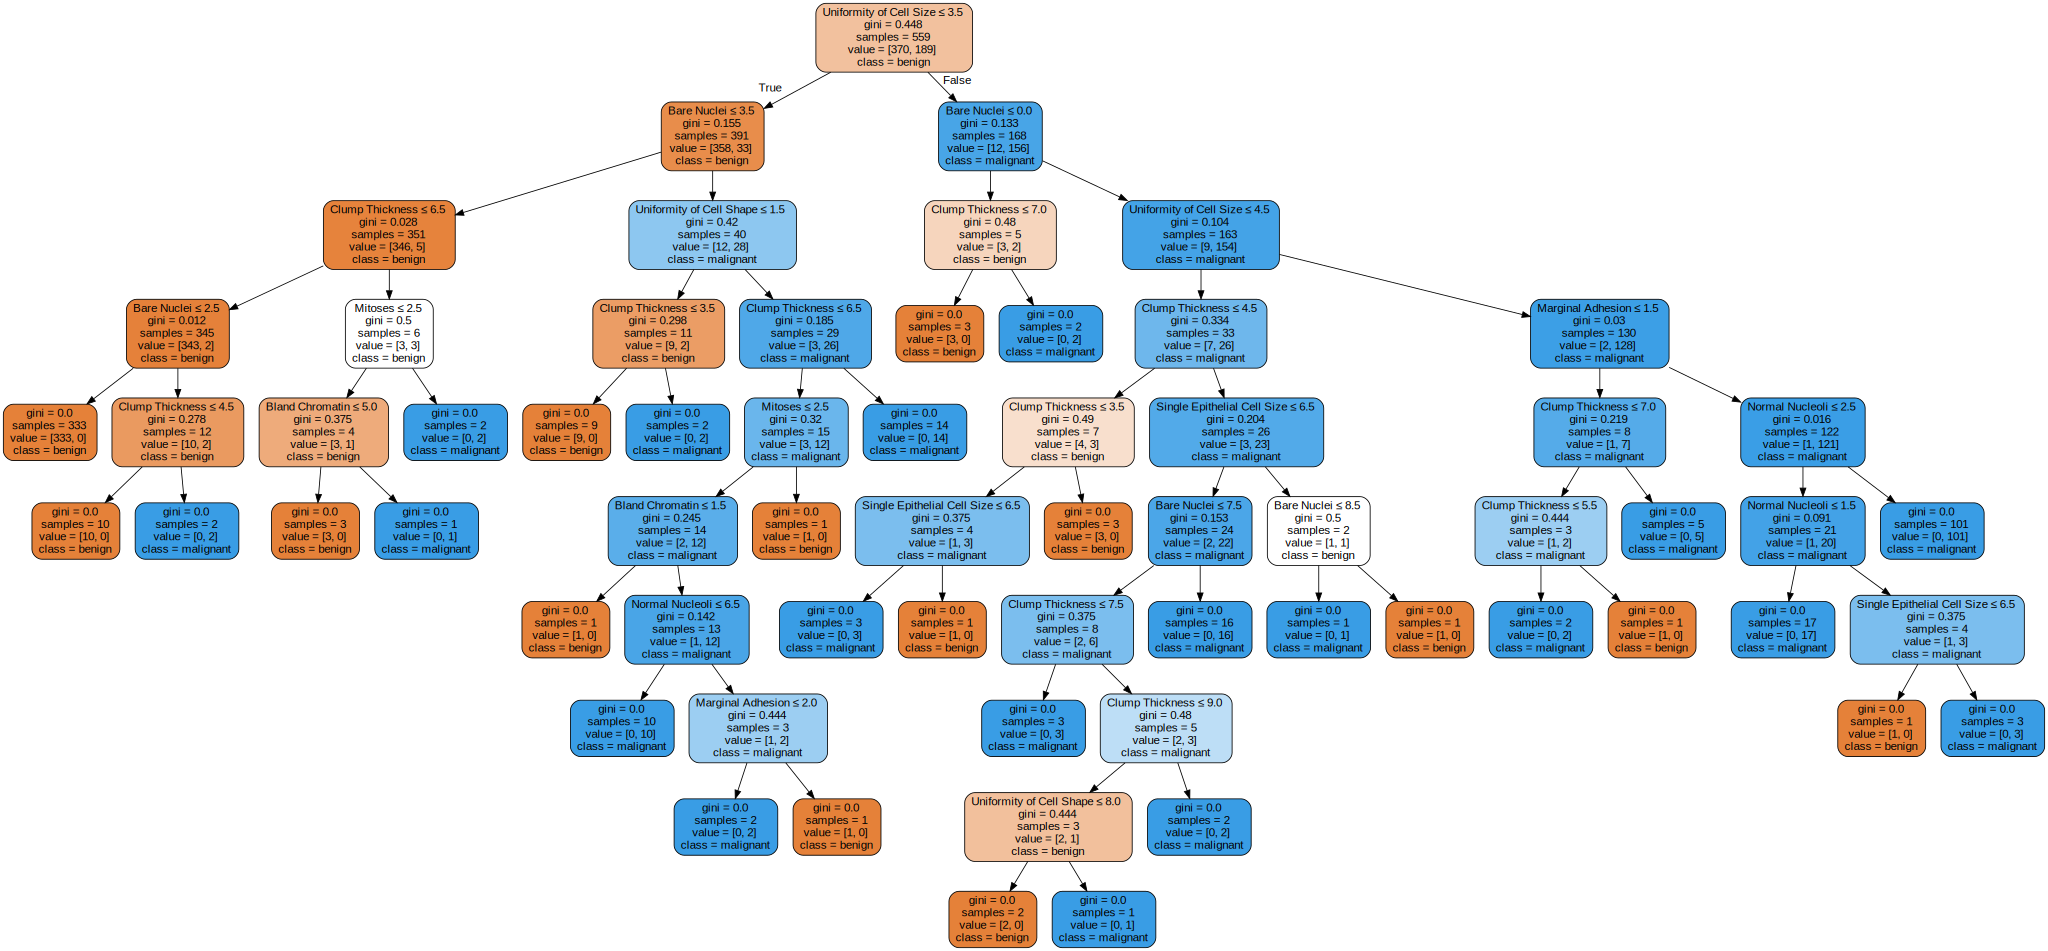

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                      class_names=class_names,  
                      filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data)
graph